In [1]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [43]:
df = pd.read_csv(r"C:\Users\user\Desktop\MBA_CAP_2\4_DataSets\Test103_Cleaned_Ext.csv",encoding= 'ISO-8859-1', low_memory=False).drop(columns=["Unnamed: 0"]) 

In [5]:
import nltk
from nltk import FreqDist
nltk.download('stopwords') # run this one time
import pandas as pd 
pd.set_option("display.max_colwidth", 200) 
import numpy as np 
import re 
# libraries for visualization 
# import pyLDAvis 
# import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>


In [44]:
df.head()

,Name,Tweet_Date,Tweet
0,Ally_Kayyy,2023-03-04 23:59,Some customer came in and said I looked like a fairy and thatll be up there with one of the best things anyone has said to me
1,PaytmBa74630656,2023-03-04 23:59,Hi we are here to help you Please share us your mobile number registered with Paytm via DM so that we paytm handle customer care number8260429689 Thanks
2,_Marquita_R,2023-03-04 23:59,Stop tellin Chris Rock to let it go That man got a fresh Skibbity Pap in front of MILLIONS If that was me im
3,pkrao20,2023-03-04 23:59,_gadkari Order ID OET261370523081022WDO125 scooter not delivered after 15 months Ola team Cut my call every time when I called customer care They took my 15 Lakh amount and even not cancelling my...
4,PaytmBa74630656,2023-03-04 23:59,Hi we are here to help you Please share us your mobile number registered with Paytm via DM so that we paytm handle customer care number8260429689 Thanks


In [7]:
# function to plot most frequent terms 
def freq_words(x, terms = 10): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()),   
             'count':list(fdist.values())}) 
  # selecting top 10 most frequent words 
  d = words_df.nlargest(columns="count", n = terms)      
  plt.figure(figsize=(30,7.5)) 
  ax = sns.barplot(data=d, x= "word", y = "count") 
  ax.set_ylabel('Count',fontsize=21)
  ax.set_xlabel("Word", fontsize=21)
  ax.set_title('Top words in Tweets',fontsize=23)
  ax.tick_params(axis='x', labelsize=15, rotation=45)
  plt.show()

In [8]:
tweet = df['Tweet'].head()

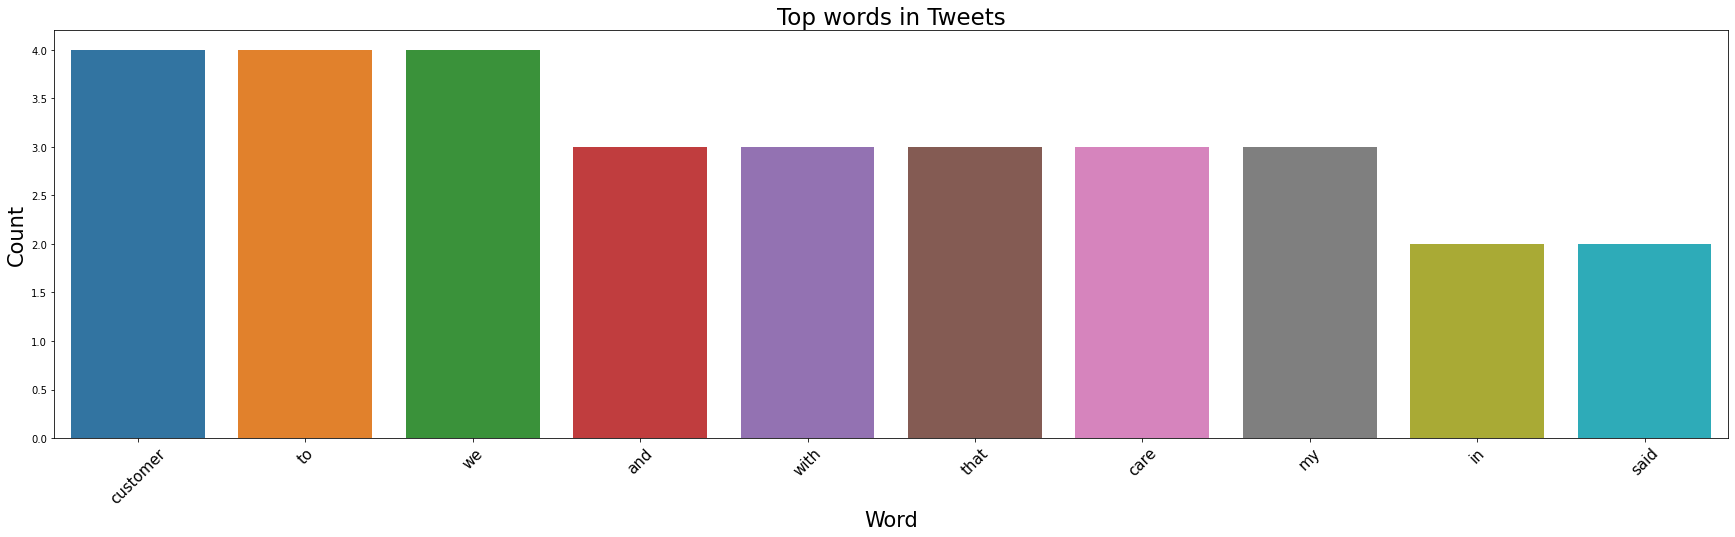

In [9]:
freq_words(tweet, 10)

In [45]:
tokenized_reviews_d = pd.Series(tweet).apply(lambda x: x.split())
print(tokenized_reviews_d[1])

['help', 'please', 'share', 'mobile', 'number', 'registered', 'paytm', 'paytm', 'handle', 'customer', 'care', 'number8260429689', 'thanks']


In [46]:
from nltk.corpus import stopwords 
stop_words = stopwords.words('english')

In [47]:
# function to remove stopwords 
def remove_stopwords(rev):     
  rev_new = " ".join([i for i in rev if i not in stop_words])      
  return rev_new 

In [48]:
# remove short words (length < 3) 
df['Tweet'] = df['Tweet'].astype(str).apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) 
# remove stopwords from the text 
tweet = [remove_stopwords(r.split()) for r in df['Tweet']] 
# make entire text lowercase 
tweet = [r.lower() for r in tweet]

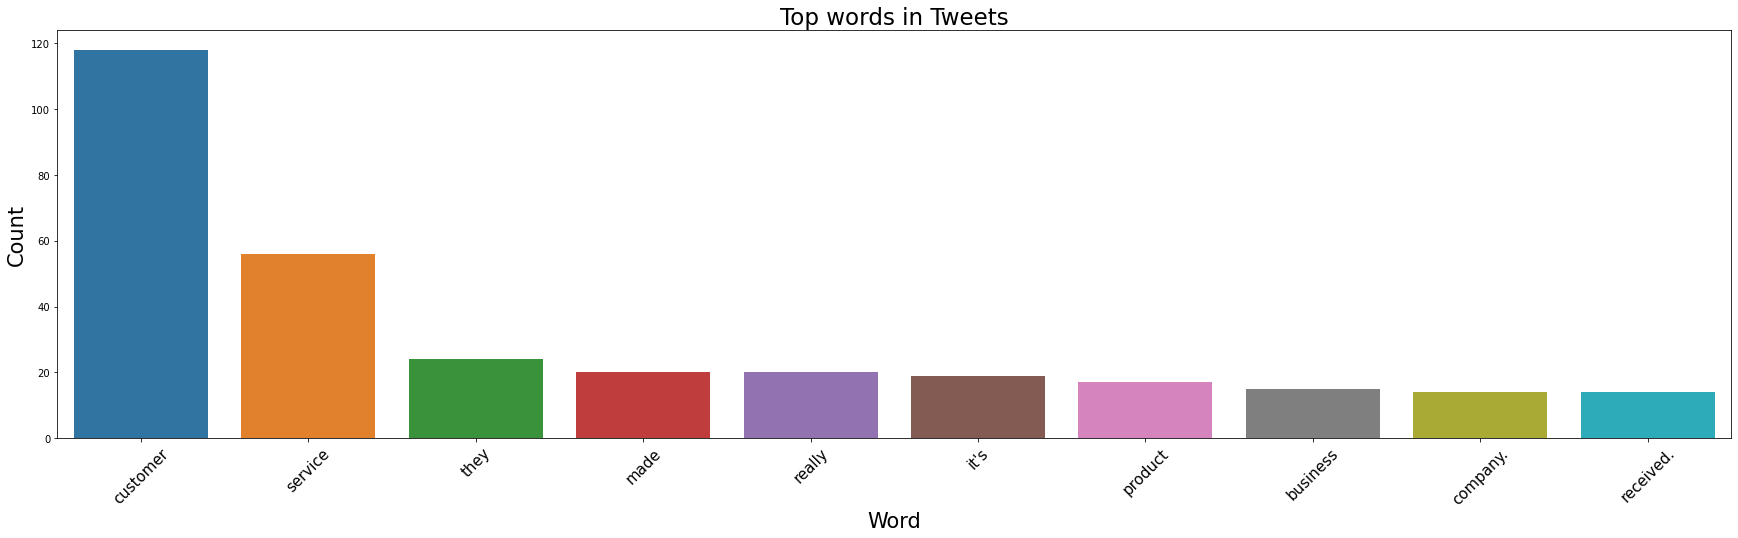

In [49]:
freq_words(tweet, 10)

In [50]:
df.head()

,Name,Tweet_Date,Tweet
0,Ally_Kayyy,2023-03-04 23:59,Some customer came said looked like fairy thatll there with best things anyone said
1,PaytmBa74630656,2023-03-04 23:59,here help Please share your mobile number registered with Paytm that paytm handle customer care number8260429689 Thanks
2,_Marquita_R,2023-03-04 23:59,Stop tellin Chris Rock That fresh Skibbity front MILLIONS that
3,pkrao20,2023-03-04 23:59,_gadkari Order OET261370523081022WDO125 scooter delivered after months team call every time when called customer care They took Lakh amount even cancelling order centre govt
4,PaytmBa74630656,2023-03-04 23:59,here help Please share your mobile number registered with Paytm that paytm handle customer care number8260429689 Thanks


In [51]:
# Word Cloud
from wordcloud import WordCloud, STOPWORDS

In [52]:
allWords = ' '.join([twts for twts in df["Tweet"]])
exclude_words = {"customer", "customer service","n't",'experience',"team","support","issue","made","will","product","business","company","service","said"}

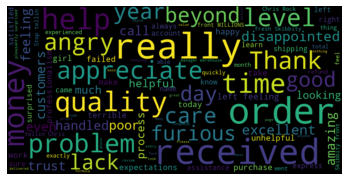

In [53]:
wordCloud = WordCloud(stopwords=STOPWORDS.union(exclude_words),width = 1100, height = 550,max_words=100 ,random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [18]:
import nltk

In [59]:
# nltk.download('punkt')
# nltk.download('wordnet')

In [19]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

In [20]:
# Define function to apply lemmatization to a single text string
def lemmatize_text(text):
    # Tokenize text into individual words
    words = word_tokenize(text)
    # Apply lemmatization to each word
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    # Join lemmatized words back into a single string
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text

In [21]:
# Apply lemmatization to a single column of a dataframe
df['Tweet'] = df['Tweet'].apply(lemmatize_text)

In [22]:
df.head()

,Name,Tweet_Date,Tweet
0,Ally_Kayyy,2023-03-04 23:59,Some customer came said looked like fairy thatll there with best thing anyone said
1,PaytmBa74630656,2023-03-04 23:59,here help Please share your mobile number registered with Paytm that paytm handle customer care number8260429689 Thanks
2,_Marquita_R,2023-03-04 23:59,Stop tellin Chris Rock That fresh Skibbity front MILLIONS that
3,pkrao20,2023-03-04 23:59,_gadkari Order OET261370523081022WDO125 scooter delivered after month team call every time when called customer care They took Lakh amount even cancelling order centre govt
4,PaytmBa74630656,2023-03-04 23:59,here help Please share your mobile number registered with Paytm that paytm handle customer care number8260429689 Thanks


In [23]:
from nrclex import NRCLex

In [65]:
text = 'Everything seems to be wrong with bugs'

In [66]:
emotion = NRCLex(text)
j = emotion.top_emotions

In [67]:
a1 = emotion.affect_frequencies
a1

{'fear': 0.0,
 'anger': 0.0,
 'anticip': 0.0,
 'trust': 0.0,
 'surprise': 0.0,
 'positive': 0.0,
 'negative': 1.0,
 'sadness': 0.0,
 'disgust': 0.0,
 'joy': 0.0}

In [24]:
def ext_emo(df):
    k = []
    for i in df:
        txt = i
        emotion = NRCLex(txt)
        j = emotion.affect_frequencies
        k.append(j)
        df = pd.DataFrame(k, columns=["fear",'anger','anticip','trust','surprise','positive','negative','sadness','disgust','joy',])
        col_with_max_value = df.idxmax(axis=1)
        df1 = pd.DataFrame(col_with_max_value, columns=['Emotions'])
        df["Emotions"] = df1['Emotions']
        emotion_value = df.iloc[:,0:len(df)-1].max(axis=1)
        emotion_value_df = pd.DataFrame(emotion_value,columns=["Top_Value"])
        df["Emotions_Value"] = emotion_value_df['Top_Value']
    return df

In [25]:
df1 = ext_emo(df['Tweet'])

In [26]:
df1.head()

,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,Emotions,Emotions_Value
0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.000000,positive,1.000000
1,0.0,0.0,0.0,0.166667,0.0,0.333333,0.0,0.0,0.0,0.166667,positive,0.333333
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,fear,0.000000
3,0.0,0.0,0.0,0.333333,0.0,0.333333,0.0,0.0,0.0,0.000000,trust,0.333333
4,0.0,0.0,0.0,0.166667,0.0,0.333333,0.0,0.0,0.0,0.166667,positive,0.333333


In [27]:
df1["Tweet"] = df['Tweet']

In [28]:
df1.head()

,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,Emotions,Emotions_Value,Tweet
0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.000000,positive,1.000000,Some customer came said looked like fairy thatll there with best thing anyone said
1,0.0,0.0,0.0,0.166667,0.0,0.333333,0.0,0.0,0.0,0.166667,positive,0.333333,here help Please share your mobile number registered with Paytm that paytm handle customer care number8260429689 Thanks
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,fear,0.000000,Stop tellin Chris Rock That fresh Skibbity front MILLIONS that
3,0.0,0.0,0.0,0.333333,0.0,0.333333,0.0,0.0,0.0,0.000000,trust,0.333333,_gadkari Order OET261370523081022WDO125 scooter delivered after month team call every time when called customer care They took Lakh amount even cancelling order centre govt
4,0.0,0.0,0.0,0.166667,0.0,0.333333,0.0,0.0,0.0,0.166667,positive,0.333333,here help Please share your mobile number registered with Paytm that paytm handle customer care number8260429689 Thanks


In [29]:
df1['Emotions'].unique()

array(['positive', 'fear', 'trust', 'anger', 'negative', 'surprise'],
      dtype=object)

In [30]:
counts = df1['Emotions'].value_counts()

In [31]:
counts

positive    116
trust        29
fear         20
negative     16
anger        14
surprise      5
Name: Emotions, dtype: int64

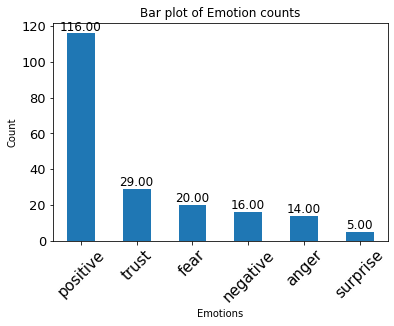

<Figure size 3240x1440 with 0 Axes>

In [33]:
ax = counts.plot(kind='bar')
ax.set_title('Bar plot of Emotion counts')
ax.set_xlabel('Emotions')
ax.set_ylabel('Count')
ax.tick_params(axis='x', labelsize=15, rotation=45)
ax.tick_params(axis='y', labelsize=13)
plt.figure(figsize=(45,20)) 

# Display the values on top of the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%.2f' % p.get_height(), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

In [171]:
df1.to_csv("For_Power_BI.csv")

In [34]:
#  Textblob for Getting Subjectivity and Polarity Score

In [40]:
from textblob import TextBlob

In [37]:
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Creat a function to get the Polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [38]:
#Create a functiion to compute negative, neutral and Positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [55]:
df_tb = df.copy()

In [56]:
#Create two new columns
df_tb['Subjectivity'] = df['Tweet'].apply(getSubjectivity)
df_tb['Polarity'] = df['Tweet'].apply(getPolarity)

#Show new dataframe with new columns
df_tb.head()

,Name,Tweet_Date,Tweet,Subjectivity,Polarity
0,Ally_Kayyy,2023-03-04 23:59,Some customer came said looked like fairy thatll there with best things anyone said,0.3,1.0
1,PaytmBa74630656,2023-03-04 23:59,here help Please share your mobile number registered with Paytm that paytm handle customer care number8260429689 Thanks,0.2,0.2
2,_Marquita_R,2023-03-04 23:59,Stop tellin Chris Rock That fresh Skibbity front MILLIONS that,0.5,0.3
3,pkrao20,2023-03-04 23:59,_gadkari Order OET261370523081022WDO125 scooter delivered after months team call every time when called customer care They took Lakh amount even cancelling order centre govt,0.0,0.0
4,PaytmBa74630656,2023-03-04 23:59,here help Please share your mobile number registered with Paytm that paytm handle customer care number8260429689 Thanks,0.2,0.2


In [57]:
df_tb['Analysis'] = df_tb['Polarity'].apply(getAnalysis)

# Show the df
df_tb.head()

,Name,Tweet_Date,Tweet,Subjectivity,Polarity,Analysis
0,Ally_Kayyy,2023-03-04 23:59,Some customer came said looked like fairy thatll there with best things anyone said,0.3,1.0,Positive
1,PaytmBa74630656,2023-03-04 23:59,here help Please share your mobile number registered with Paytm that paytm handle customer care number8260429689 Thanks,0.2,0.2,Positive
2,_Marquita_R,2023-03-04 23:59,Stop tellin Chris Rock That fresh Skibbity front MILLIONS that,0.5,0.3,Positive
3,pkrao20,2023-03-04 23:59,_gadkari Order OET261370523081022WDO125 scooter delivered after months team call every time when called customer care They took Lakh amount even cancelling order centre govt,0.0,0.0,Neutral
4,PaytmBa74630656,2023-03-04 23:59,here help Please share your mobile number registered with Paytm that paytm handle customer care number8260429689 Thanks,0.2,0.2,Positive


In [62]:
df_tb["Sentiment_NRCLex"] = df1["Emotions"]
df_tb["NRCLex_Emotion_Value"] = df1["Emotions_Value"]

In [63]:
df_tb.head()

,Name,Tweet_Date,Tweet,Subjectivity,Polarity,Analysis,Sentiment_NRCLex,NRCLex_Emotion_Value
0,Ally_Kayyy,2023-03-04 23:59,Some customer came said looked like fairy thatll there with best things anyone said,0.3,1.0,Positive,positive,1.000000
1,PaytmBa74630656,2023-03-04 23:59,here help Please share your mobile number registered with Paytm that paytm handle customer care number8260429689 Thanks,0.2,0.2,Positive,positive,0.333333
2,_Marquita_R,2023-03-04 23:59,Stop tellin Chris Rock That fresh Skibbity front MILLIONS that,0.5,0.3,Positive,fear,0.000000
3,pkrao20,2023-03-04 23:59,_gadkari Order OET261370523081022WDO125 scooter delivered after months team call every time when called customer care They took Lakh amount even cancelling order centre govt,0.0,0.0,Neutral,trust,0.333333
4,PaytmBa74630656,2023-03-04 23:59,here help Please share your mobile number registered with Paytm that paytm handle customer care number8260429689 Thanks,0.2,0.2,Positive,positive,0.333333


In [70]:
df_value_counts = df_tb['Analysis'].value_counts()

<AxesSubplot:>

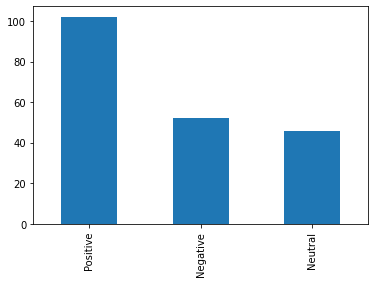

In [71]:
df_value_counts.plot.bar()

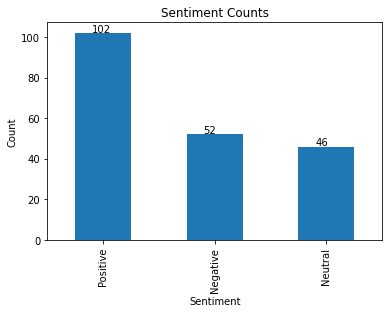

In [74]:
# create a bar plot from the counts
ax = df_value_counts.plot.bar(rot=90)
# add data labels to the bars
for i, v in enumerate(df_value_counts):
    ax.text(i - 0.1, v + 0.5, str(v))
    
# set the axis labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Counts')

# display the plot
plt.show()

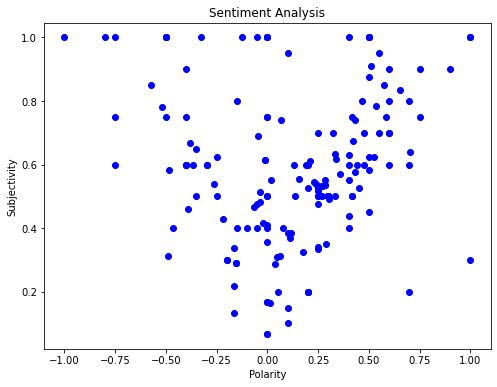

In [75]:
# Polt the polarity and Subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df_tb['Polarity'][i],df_tb['Subjectivity'][i], color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()